In [47]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [229]:
# 加载地图shp文件
oklahoma_map = gpd.read_file('Igismap/UnitedStates_Boundary.shp')

# earthquake data
inputdir = "datasets/EarthquakeData"
all_earthquake_df = pd.DataFrame()

for root, dirnames, filenames in os.walk(inputdir):
    for filename in filenames:
        df = pd.read_csv(os.path.join(root, filename))
        all_earthquake_df = all_earthquake_df.append(df, ignore_index=True)
        

In [230]:
all_earthquake_df['origintime'] = all_earthquake_df['origintime'].astype('datetime64')
all_earthquake_df.sort_values(by='origintime')  # 2005-10-28 -- 2021-05-05
# 设置origintime为index
all_earthquake_df = all_earthquake_df.set_index('origintime')

In [231]:
# earthquake_df = all_earthquake_df
start = "2019"
# end = "2019"
earthquake_df = all_earthquake_df.loc[start:]

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


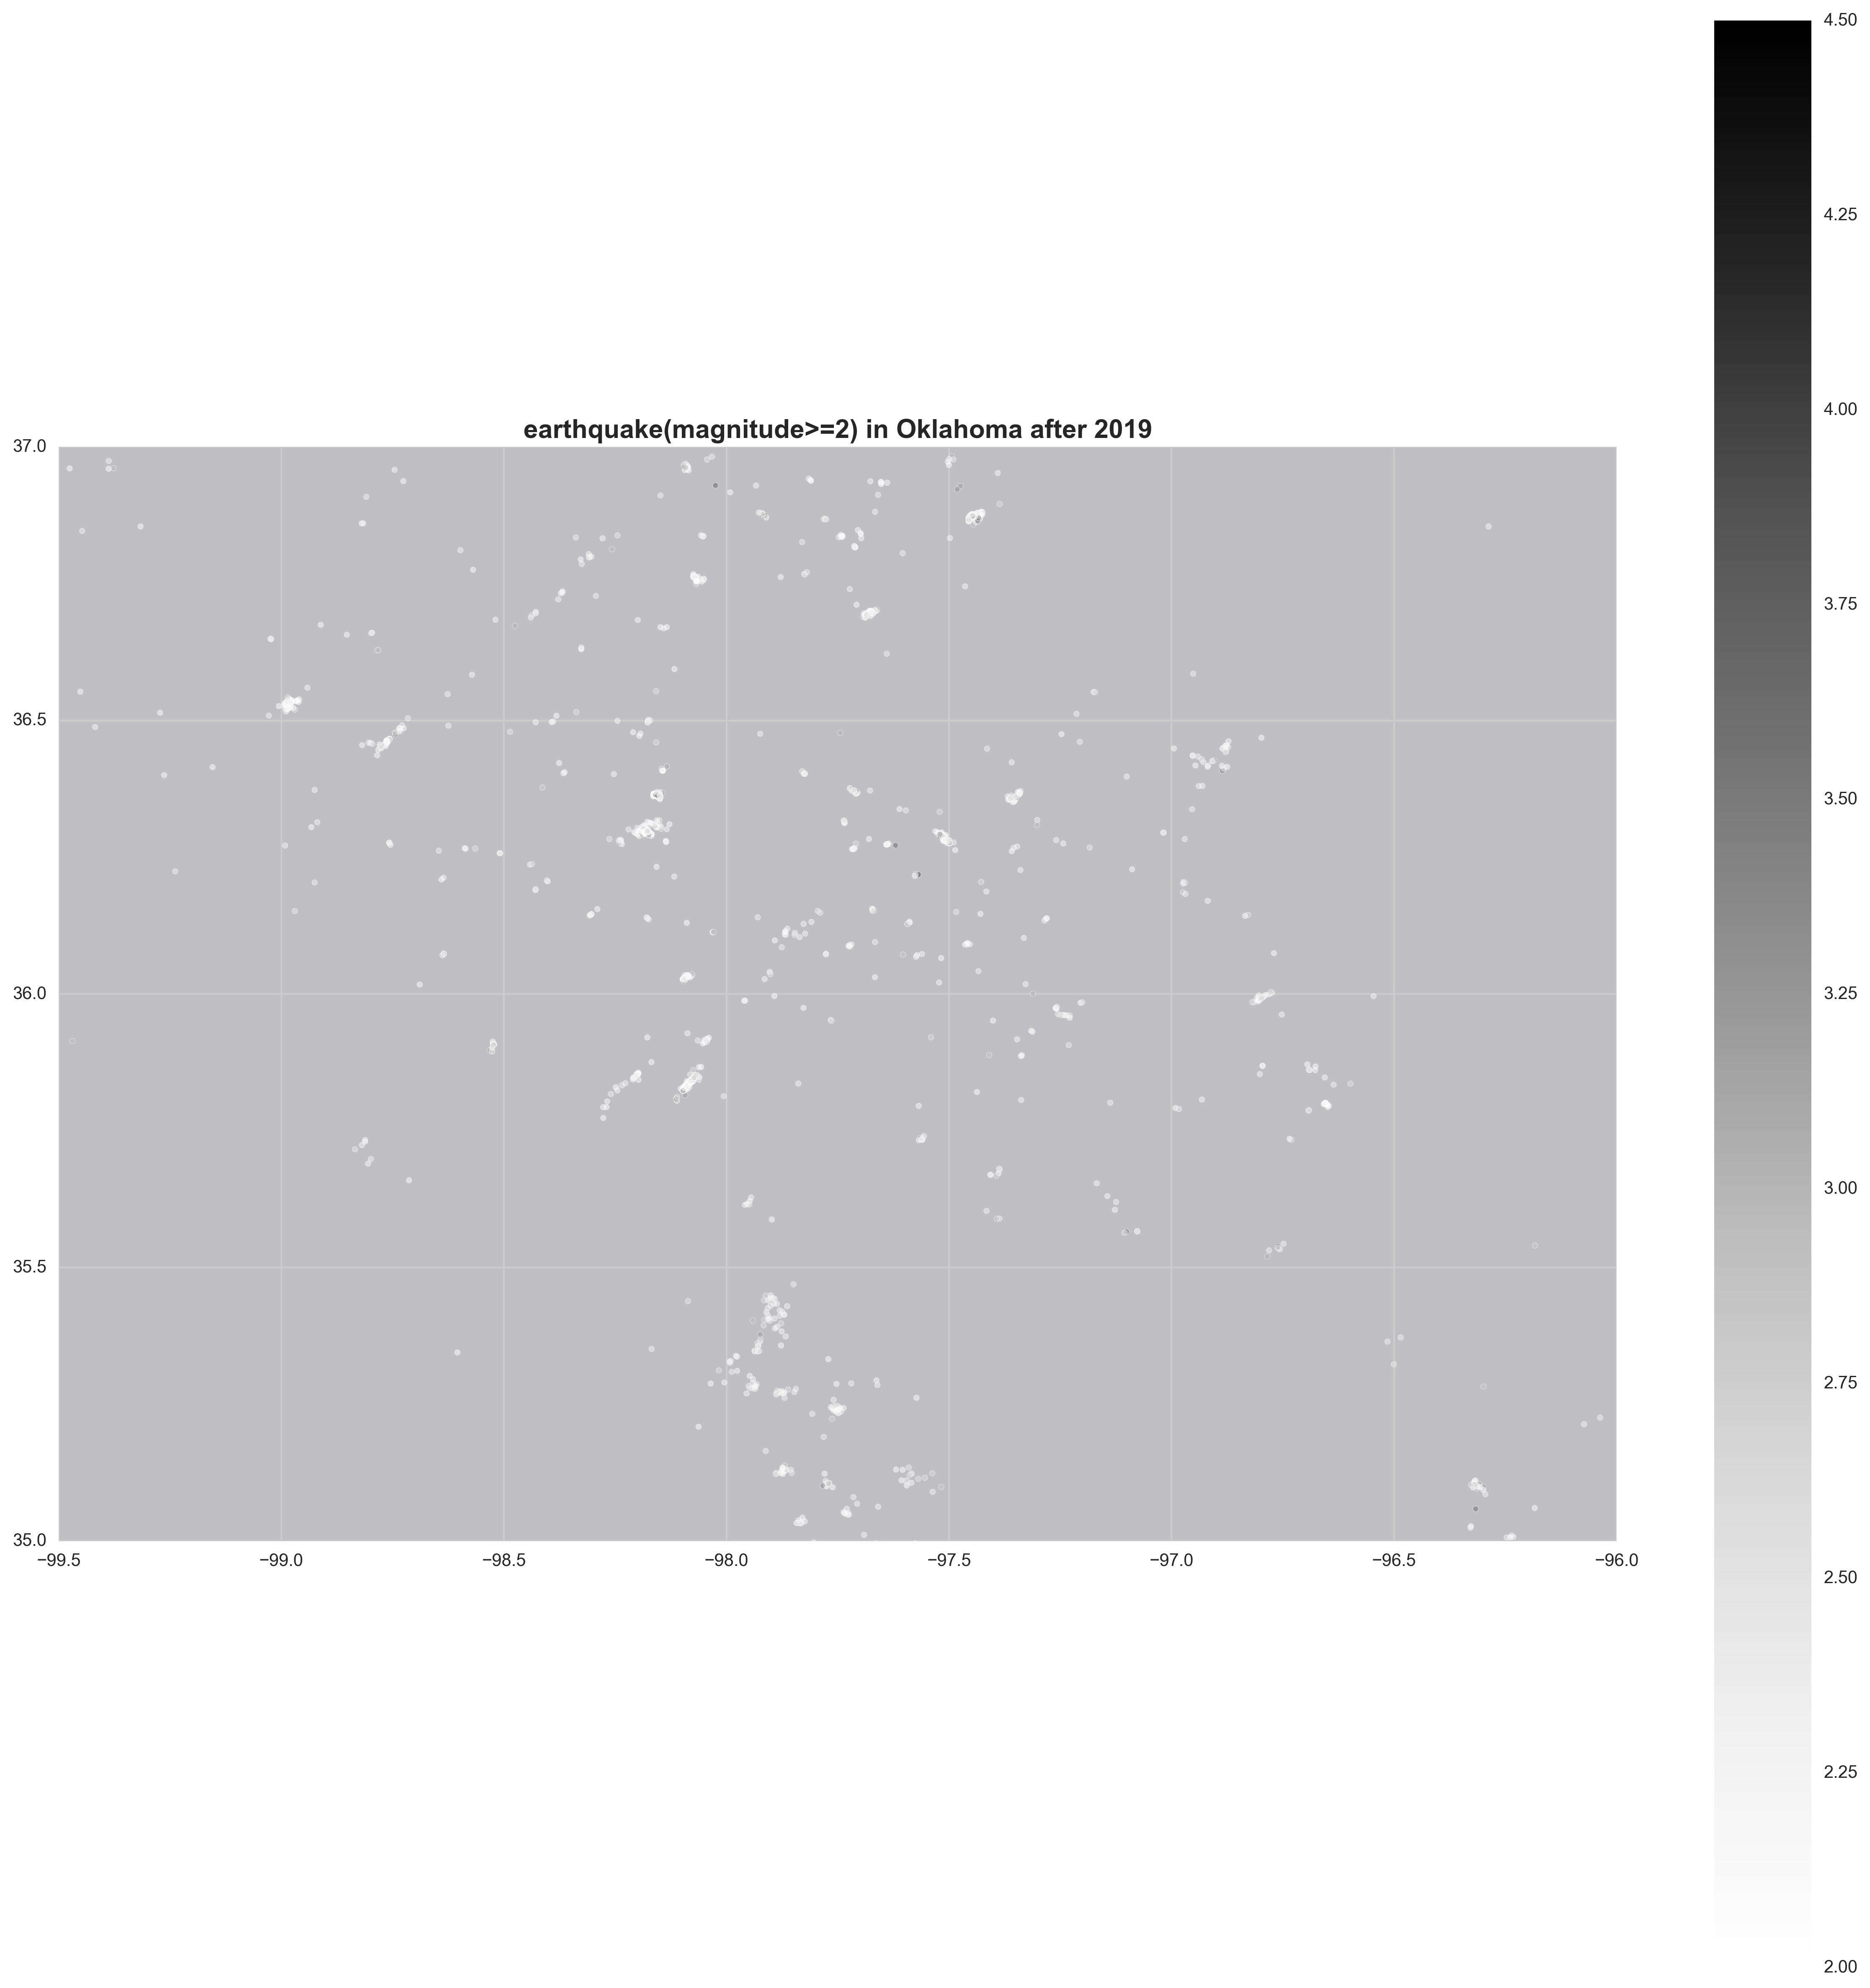

In [232]:
# designate coordinate system
crs = {'init':'epsg:4326'}

# zip x and y coordinates into single feature
earthquake_geometry = [Point(xy) for xy in zip(earthquake_df['longitude'], earthquake_df['latitude'])]

# create GeoPandas dataframe
earthquake_geo_df = gpd.GeoDataFrame(earthquake_df, crs = crs, geometry = earthquake_geometry)


# earthquake 分布
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘magnitude’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
earthquake_geo_df.plot(column='magnitude',ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('earthquake(magnitude>=2) in Oklahoma after ' + start, fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-99.5, -96)
plt.ylim(35, 37)
# plt.xlim(-98, -97.5)
# plt.ylim(36.5, 37)
# show map
plt.show()

# Year injection

In [66]:
# injection data
inputdir = "datasets/OCC_injection_data/YearlyInjectionRecords"
# inputdir = "datasets/OCC_injection_data/MonthlyInjectionRecords"
yearly_injection_df = pd.DataFrame()

for root, dirnames, filenames in os.walk(inputdir):
    for filename in filenames:
        df = pd.read_excel(os.path.join(root, filename))
        yearly_injection_df = yearly_injection_df.append(df, ignore_index=True)

In [193]:
yearly_injection_df['Year Vol'] = yearly_injection_df['Jan Vol'] + \
                                yearly_injection_df['Feb Vol'] + \
                                yearly_injection_df['Mar Vol'] + \
                                yearly_injection_df['Apr Vol'] + \
                                yearly_injection_df['May Vol'] + \
                                yearly_injection_df['Jun Vol'] + \
                                yearly_injection_df['Jul Vol'] + \
                                yearly_injection_df['Aug Vol'] + \
                                yearly_injection_df['Sep Vol'] + \
                                yearly_injection_df['Oct Vol'] + \
                                yearly_injection_df['Nov Vol'] + \
                                yearly_injection_df['Dec Vol']

yearly_injection_df = yearly_injection_df.dropna(subset=["LAT", "LON"])

In [ ]:
# 设置Report_Date为index
yearly_injection_df = yearly_injection_df.set_index('ReportYear')

In [ ]:
injection_geo_df['LAT'].isnull().any()

In [151]:
yearly_injection_df

,API,OperatorName,WellName,WellNumber,Status,WellStatus,WellType,LAT,LON,County,...,Sep Vol,Sep PSI,Oct Vol,Oct PSI,Nov Vol,Nov PSI,Dec Vol,Dec PSI,Year Vol,geometry
ReportYear,,,,,,,,,,,,,,,,,,,,,
2017-01-01,3500300026,PHOENIX PETROCORP INC,SE EUREKA UNIT-TUCKER #1,21,OPEN,AC,2RIn,36.900396,-98.219252,ALFALFA,...,1800.0,1000.0,1704.0,1000.0,1179.0,1000.0,832.0,950.0,17799.0,POINT (-98.21925 36.90040)
2017-01-01,3500300163,SUPERIOR PRODUCTION LLC,CHRISTENSEN,1,OPEN,AC,2RIn,36.896636,-98.177720,ALFALFA,...,525.0,200.0,525.0,200.0,525.0,200.0,525.0,200.0,8188.0,POINT (-98.17772 36.89664)
2017-01-01,3500320786,BLACK ANVIL OPERATING LLC,NE CHEROKEE UNIT,85,OPEN,TA,TM,36.806113,-98.325840,ALFALFA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-98.32584 36.80611)
2017-01-01,3500321074,SANDRIDGE EXPLORATION & PRODUCTION LLC,VELMA,2-19,OPEN,AC,2RIn,36.888589,-98.318530,ALFALFA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-98.31853 36.88859)
2017-01-01,3500321107,SUPERIOR PRODUCTION LLC,GRAY,1A,OPEN,AC,2RIn,36.892139,-98.196351,ALFALFA,...,525.0,250.0,525.0,250.0,525.0,250.0,525.0,250.0,7879.0,POINT (-98.19635 36.89214)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,3515323353,WHEELER ENERGY LLC,"MCGU ""1"" (MCGOU A)",1-27 WIW,OPEN,AC,2RIn,36.262634,-99.548620,WOODWARD,...,638.0,500.0,282.0,300.0,1811.0,800.0,0.0,100.0,33961.0,POINT (-99.54862 36.26263)
2019-01-01,3515323377,WOODWARD IODINE CORPORATION,WOODWARD IODINE,45,OPEN,AC,2DNC,36.520570,-99.334540,WOODWARD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,454.0,POINT (-99.33454 36.52057)
2019-01-01,3515323424,WOODWARD IODINE CORPORATION,CEI SWD,24-1,OPEN,AC,2DNC,36.276890,-99.298870,WOODWARD,...,64199.0,87.0,74792.0,73.0,68477.0,74.0,40500.0,64.0,663882.0,POINT (-99.29887 36.27689)


In [195]:
# injection_df = monthly_injection_df
start = "2019"
end = "2021"
injection_df = yearly_injection_df.loc[start:end]

In [196]:
injection_df.shape

(11351, 57)

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


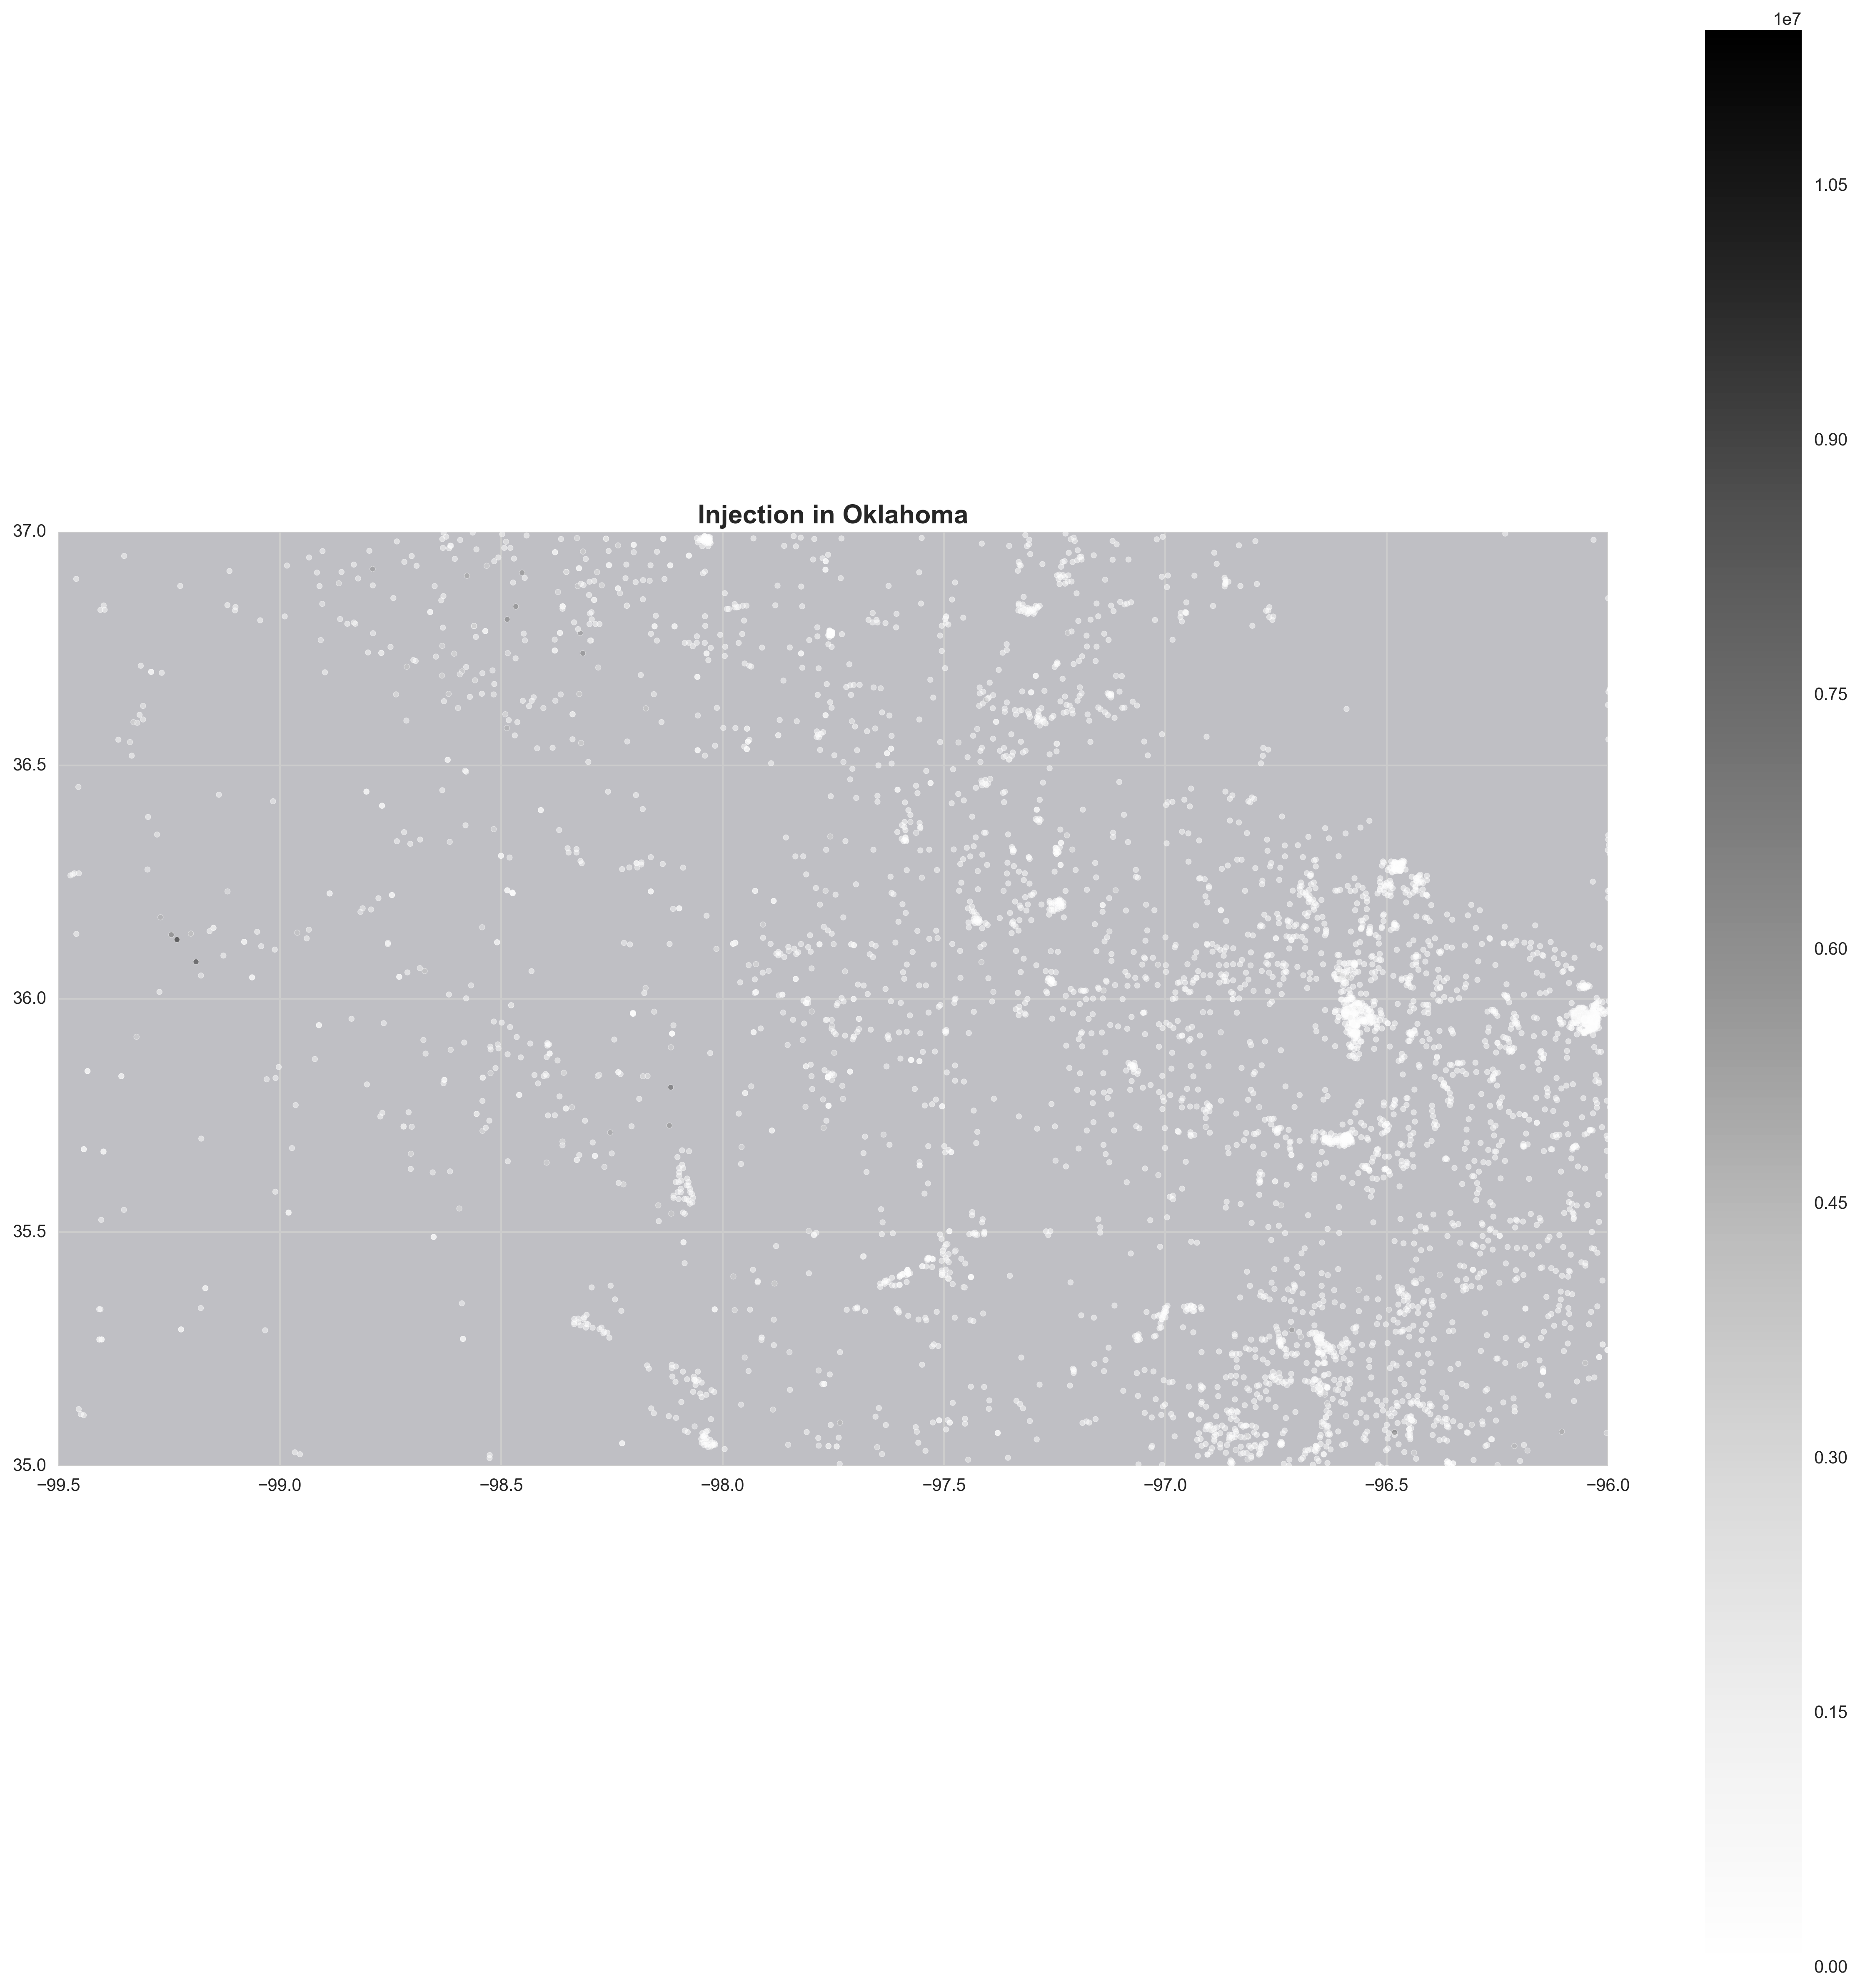

In [204]:
# designate coordinate system
crs = {'init':'epsg:4326'}

# zip x and y coordinates into single feature
injection_geometry = [Point(xy) for xy in zip(injection_df['LON'], injection_df['LAT'])]

# create GeoPandas dataframe
injection_geo_df = gpd.GeoDataFrame(injection_df, crs = crs, geometry = injection_geometry)

# Injection 分布
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘Volume_BPD’ variaable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
injection_geo_df.plot(column='Year Vol',ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('Injection in Oklahoma', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-99.5, -96)
plt.ylim(35, 37)
# plt.xlim(-98, -97.5)
# plt.ylim(36.5, 37)
# show map
plt.show()

# well

In [214]:
inputdir = "datasets/WellData/"
all_well_df = pd.read_csv(inputdir + "Export - Excel Well Workbook_Header.csv")

all_well_df['Permit Date'] = all_well_df['Permit Date'].astype('datetime64')
all_well_df = all_well_df.dropna(subset=["Permit Date", "Surface Latitude", "Surface Longitude"])
# 设置Report_Date为index
all_well_df = all_well_df.set_index('Permit Date')

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (24,28,31,33,42,46,48,49,50,55,58,62,70,73,76) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [215]:
all_well_df

,UWI,Source,API Number,IC Number,Regulatory API,Operator Name,Operator City,Current Operator Name,Current Operator City,Lease Name,...,Surface LL Source,Proposed BH Latitude,Proposed BH Longitude,Proposed BH LL Source,BH Latitude,BH Longitude,BH LL Source,Activity Code,Permit Filer Long,Permit Phone
Permit Date,,,,,,,,,,,,,,,,,,,,,
1978-04-08,3.508320e+13,PI,3.508320e+13,NaN,3.508321e+09,MOORE REX R JR,NaN,MOORE REX R JR,NaN,WYATT `A`UNIT,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN
1978-07-08,3.508320e+13,PI,3.508320e+13,NaN,3.508321e+09,HADSON OHIO OIL CO,NaN,HADSON OHIO OIL CO,NaN,KIRKPATRICK,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN
1978-07-28,3.508320e+13,PI,3.508320e+13,NaN,NaN,LOBAR OIL CO INC,NaN,LOBAR OIL CO INC,NaN,DENNY,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
1978-09-08,3.508320e+13,PI,3.508320e+13,NaN,NaN,BLAIK OIL CO,NaN,BLAIK OIL CO,NaN,WALL,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
1978-08-08,3.508320e+13,PI,3.508320e+13,NaN,3.508321e+09,MOORE REX R JR,NaN,MOORE REX R JR,NaN,WYATT UNIT,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974-08-18,3.514920e+13,PI,3.514920e+13,NaN,NaN,PHILLIPS PETROLEUM CO,NaN,PHILLIPS PETROLEUM CO,NaN,LUEKENGA /A/,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
1974-09-30,3.514920e+13,PI,3.514920e+13,NaN,NaN,ENSERCH EXPLORATION INC,NaN,ENSERCH EXPLORATION INC,NaN,ADA STINSON,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
1974-11-23,3.514920e+13,PI,3.514920e+13,NaN,NaN,EL PASO NATURAL GAS CO,NaN,BURLINGTON RESOURCES O&G CO LP,NaN,PIERCE WILLIE `A`,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN


In [216]:
# injection_df = monthly_injection_df
# start = "2010"
end = "2020"
well_df = all_well_df.loc[:end]

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


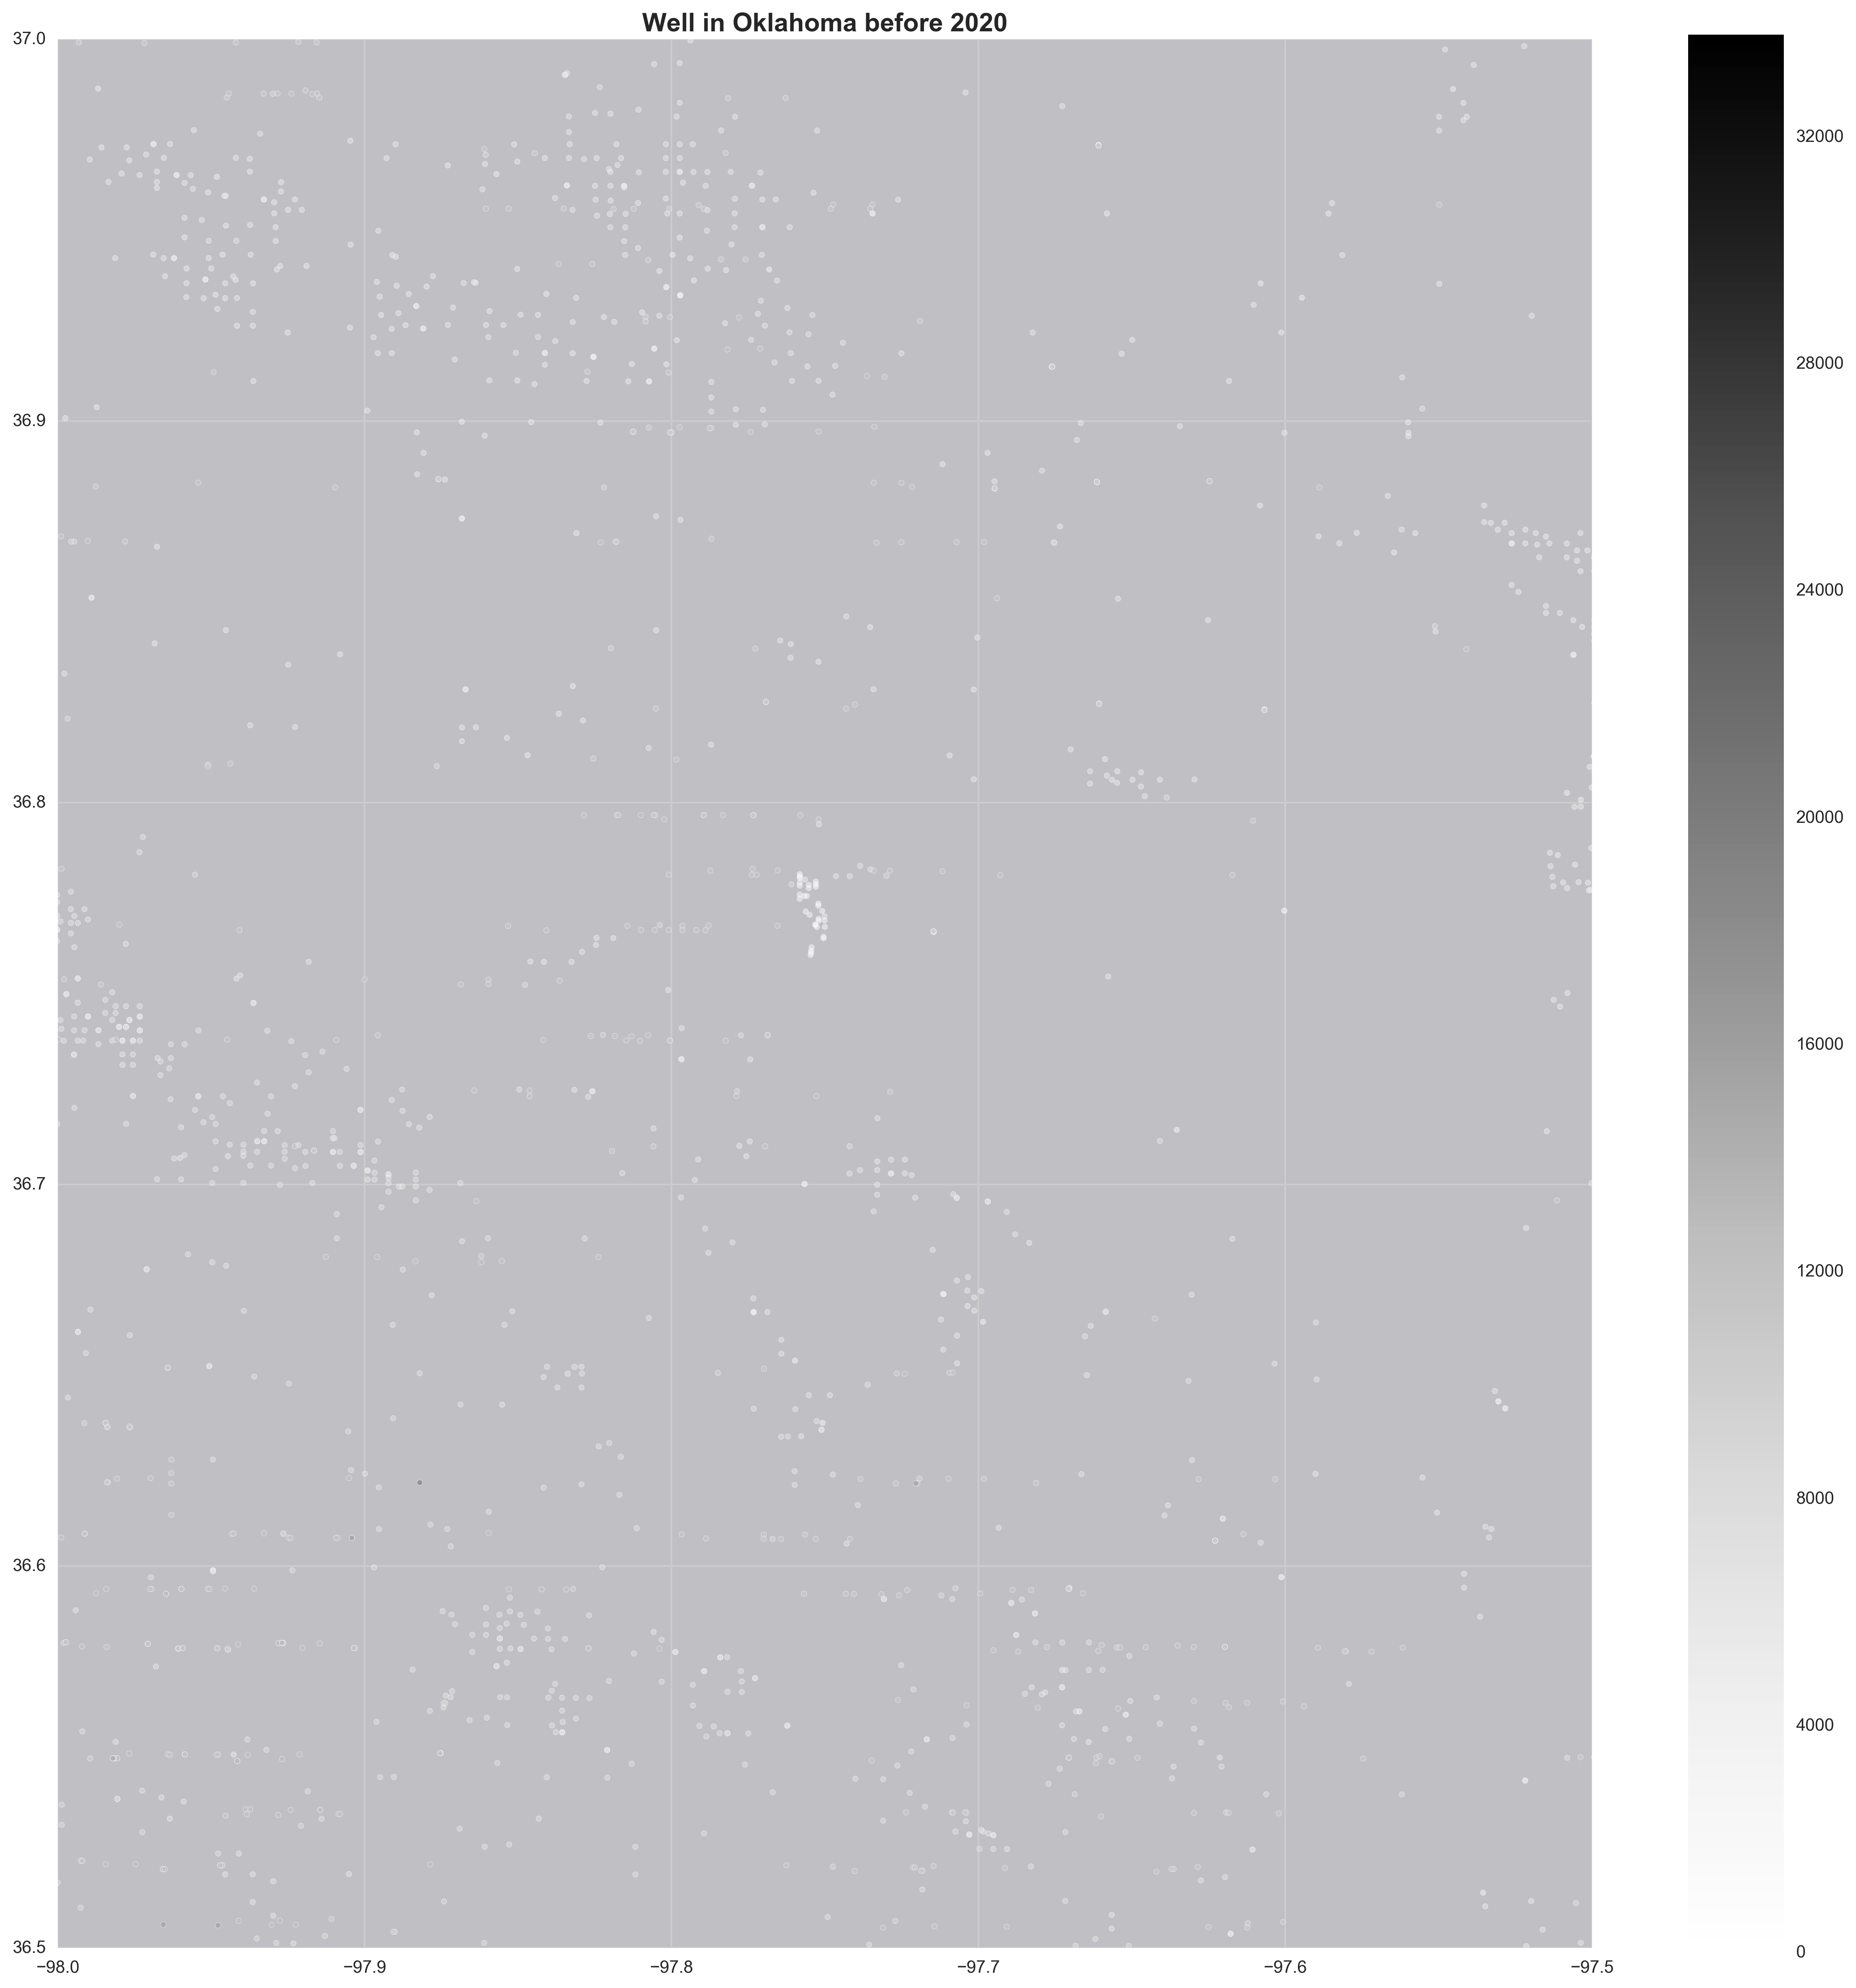

In [217]:
# designate coordinate system
crs = {'init':'epsg:4326'}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(well_df['Surface Longitude'], well_df['Surface Latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(well_df, crs = crs, geometry = geometry)

# well 分布
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘Depth Total Projected’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='Depth Total Projected',ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('Well in Oklahoma before ' + end, fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
# plt.xlim(-103.5, -94)
# plt.ylim(33, 39)
plt.xlim(-98, -97.5)
plt.ylim(36.5, 37)
# show map
plt.show()

In [219]:
# 筛选出指定区域内的well
geo_df = geo_df[(geo_df['Surface Latitude']>36.5)&(geo_df['Surface Latitude']<37)&(geo_df['Surface Longitude']>-98)&(geo_df['Surface Longitude']<-97.5)]

In [221]:
geo_df

,UWI,Source,API Number,IC Number,Regulatory API,Operator Name,Operator City,Current Operator Name,Current Operator City,Lease Name,...,Proposed BH Latitude,Proposed BH Longitude,Proposed BH LL Source,BH Latitude,BH Longitude,BH LL Source,Activity Code,Permit Filer Long,Permit Phone,geometry
Permit Date,,,,,,,,,,,,,,,,,,,,,
1985-11-07,3.505320e+13,PI,3.505320e+13,NaN,NaN,MOBIL OIL CORP,NaN,CHAPARRAL ENERGY LLC,NaN,LE FORCE `B`,...,NaN,NaN,NaN,NaN,NaN,NaN,D,% REG COMPLIANCE MGR;;;;;;;;,NaN,POINT (-97.92161 36.71033)
1985-07-23,3.505320e+13,PI,3.505320e+13,NaN,NaN,GOOD VAUGHN,NaN,W M A CORP,NaN,KIRK,...,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,POINT (-97.70817 36.69744)
1985-07-09,3.505320e+13,PI,3.505320e+13,NaN,NaN,GOOD VAUGHN,NaN,ANADARKO MINERALS INC,NaN,BULES,...,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,POINT (-97.74200 36.70285)
1985-07-19,3.505320e+13,PI,3.505320e+13,NaN,NaN,KSH INC,NaN,L & L SMITH ENERGY CORP,NaN,FORRESTER `A`,...,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,POINT (-97.75527 36.64479)
1985-07-20,3.505320e+13,PI,3.505320e+13,NaN,NaN,CHEVRON U S A INC,NaN,CHEVRON U S A INC,NaN,LEFORCE FARMS INC,...,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,POINT (-97.92270 36.70428)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-09,3.504730e+13,PI,3.504730e+13,NaN,3.504725e+09,NEON GAS LLC,EDMOND,NEON GAS LLC,EDMOND,MABRY,...,NaN,NaN,NaN,NaN,NaN,NaN,E,SUTTON WILLIAM D;;;;;;405;590;7303,4055907303,POINT (-97.77609 36.54804)
1964-09-14,3.504730e+13,PI,3.504730e+13,NaN,NaN,HAFCO OIL & GAS CO,NaN,JONES & PELLOW OIL CO,NaN,WILTY,...,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,POINT (-97.63198 36.55745)
1964-04-11,3.504730e+13,PI,3.504730e+13,NaN,NaN,HAFCO OIL & GAS CO,NaN,SEARS M N,NaN,SCHUTZ,...,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,POINT (-97.62421 36.55800)


In [250]:
from shapely.geometry import Point
import geopandas
import geopy.distance

In [251]:
well_earthquake_list = []
# iterate over all the wells in the given area
for index_well, row_well in geo_df.iterrows():
    earthquake_occurence = 0
    # iterate over all the injections
    for index_earthquake, row_earthquake in earthquake_geo_df.iterrows():
        if index_well < index_earthquake:
            well = row_well['geometry']
            earthquake = row_earthquake['geometry']
            # calculate the distance
            dist = geopy.distance.geodesic([well.y, well.x],[earthquake.y, earthquake.x])
            if dist <= 20: # add earthquake occurence for each well in 50km radius
                earthquake_occurence = earthquake_occurence + 1
    well_earthquake_list.append(earthquake_occurence)

geo_df['Earthquake Occurence'] = well_earthquake_list

In [252]:
well_injection_list = []
# iterate over all the wells in the given area
for index_well, row_well in geo_df.iterrows():
    injection_volume = 0
    # iterate over all the injections
    for index_injection, row_injection in injection_geo_df.iterrows():
        if index_well < index_injection:
            well = row_well['geometry']
            injection = row_injection['geometry']
            # calculate the distance
            dist = geopy.distance.geodesic([well.y, well.x],[injection.y, injection.x])
            if dist <= 20: # add injection volume for each well in 50km radius
                injection_volume = injection_volume + row_injection['Year Vol']
    well_injection_list.append(injection_volume)

geo_df['Injection Volume'] = well_injection_list
geo_df.to_csv("./data/geo_df_20km.csv", index_label="Permit Date")

In [242]:
data = geo_df[['Depth Total Projected', 'Injection Volume', 'Earthquake Occurence']]

In [243]:
data = data.dropna()

In [244]:
data

,Depth Total Projected,Injection Volume,Earthquake Occurence
Permit Date,,,
1985-11-07,6300.0,128390198.0,377
1985-07-23,5881.0,93434466.0,394
1985-07-09,6000.0,97250337.0,324
1985-07-19,6050.0,94167785.0,445
1985-07-20,6300.0,129056692.0,379
...,...,...,...
2015-11-24,10800.0,111981804.0,543
2016-04-13,14200.0,131259647.0,452
2016-04-13,11700.0,131259647.0,452


# 回归

In [245]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

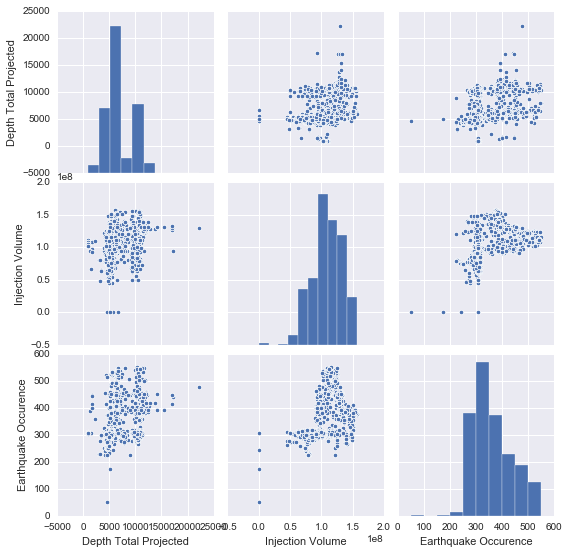

In [246]:
sns.pairplot(data)

In [247]:
data.corr(method='pearson') #pearson

,Depth Total Projected,Injection Volume,Earthquake Occurence
Depth Total Projected,1.000000,0.217871,0.270077
Injection Volume,0.217871,1.000000,0.322261
Earthquake Occurence,0.270077,0.322261,1.000000


In [248]:
data.corr(method='spearman') #spearman

,Depth Total Projected,Injection Volume,Earthquake Occurence
Depth Total Projected,1.000000,0.337469,0.464384
Injection Volume,0.337469,1.000000,0.334572
Earthquake Occurence,0.464384,0.334572,1.000000


In [249]:
x = data[['well']]
y = data[['earthquake']]

KeyError: "None of [Index(['well'], dtype='object')] are in the [columns]"

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(model.coef_)
print(model.intercept_)

[[6.52879453e-06]]
[-4.37304377]


In [44]:
pd.DataFrame(np.array(model.coef_).reshape(-1,1), x.columns, columns = ['Coeff'])

,Coeff
well,0.000007


In [45]:
predictions = model.predict(x_test)

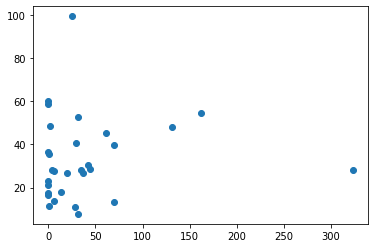

In [46]:
plt.scatter(y_test, predictions)